# LSS applied to backbone generation of Alanine dipeptide (ADP)

GitHub:
https://github.com/Ferg-Lab/LSS

Paper:
@article{sidky2020molecular,
  title={Molecular latent space simulators},
  author={Sidky, Hythem and Chen, Wei and Ferguson, Andrew L},
  journal={Chemical Science},
  volume={11},
  number={35},
  pages={9459--9467},
  year={2020},
  publisher={Royal Society of Chemistry}
}

## Allocating GPU accelerator (~1 min)

In [2]:
import torch

In [3]:
if torch.cuda.is_available():
  print('GPU available')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

GPU available


In [4]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Install necessary packages (~10 mins)

In [5]:
%pip install numpy scipy pandas scikit-learn jupyter ipywidgets==7.7.2 widgetsnbextension jupyter_contrib_nbextensions matplotlib MDTraj tqdm pytest pyemma deeptime einops torch torchvision pytorch-lightning nglview

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached deeptime-0.4.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.9 MB/s eta 0:00:00
  Installing build dependenc

In [6]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [7]:
!jupyter nbextension enable nglview --py --sys-prefix

Enabling notebook extension nglview-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [8]:
!nglview enable

Enabling notebook extension nglview-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [9]:
%pip install git+https://github.com/andrewlferguson/snrv.git

  Cloning https://github.com/andrewlferguson/snrv.git to /tmp/pip-req-build-9yo46s3w
  Running command git clone --filter=blob:none --quiet https://github.com/andrewlferguson/snrv.git /tmp/pip-req-build-9yo46s3w
  Resolved https://github.com/andrewlferguson/snrv.git to commit 63aeebc2f0253bec9f5e0ab03615c107256bf34f
  Preparing metadata (setup.py) ... done
  Created wheel for snrv: filename=snrv-0.1.0+52.g63aeebc-py3-none-any.whl size=30278 sha256=990400ad0de9544cda33596e8abf32c08ecef96cd5c0e3c07cf465c3917cd6d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-da38j82f/wheels/d8/83/c6/26e7926d23676778257c4238a0e7ca498b668f07b425672242
Successfully built snrv


In [10]:
%pip install git+https://github.com/Ferg-Lab/mdn_propagator.git

  Cloning https://github.com/Ferg-Lab/mdn_propagator.git to /tmp/pip-req-build-jf_ayb75
  Running command git clone --filter=blob:none --quiet https://github.com/Ferg-Lab/mdn_propagator.git /tmp/pip-req-build-jf_ayb75
  Resolved https://github.com/Ferg-Lab/mdn_propagator.git to commit ad8fd32faf84908b2c4f58bf7e16195a7c4f29e8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdn_propagator: filename=mdn_propagator-1.0.0+32.gad8fd32-py3-none-any.whl size=15911 sha256=c8a5d4b997405ab7c7f1ca2cf6e316dbbe3e19c6f008780c821ce50ad19f14db
  Stored in directory: /tmp/pip-ephem-wheel-cache-sywzyfsx/wheels/bc/a7/ff/4f2aa2dbe5dc942686e82380dbec7ba232e35df5f5213de831
Successfully built mdn_propagator


In [11]:
%pip install git+https://github.com/Ferg-Lab/molgen.git

  Cloning https://github.com/Ferg-Lab/molgen.git to /tmp/pip-req-build-pvm3akdy
  Running command git clone --filter=blob:none --quiet https://github.com/Ferg-Lab/molgen.git /tmp/pip-req-build-pvm3akdy
  Resolved https://github.com/Ferg-Lab/molgen.git to commit 533a1ccbcd5d59d5beea36d26a68ff4e6c28816c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for molgen: filename=molgen-1.0.0+15.g533a1cc-py3-none-any.whl size=20455 sha256=e16936e84e8a03393df369cf6f1abac81068e5c876d8203487b057cb0879760c
  Stored in directory: /tmp/pip-ephem-wheel-cache-cs5so774/wheels/1e/82/fb/a86e30e540a9156a4dfcf1eb19c92a23f5b728019e949672b1
Successfully built molgen


## Load the different components from their respective repos (~1 min)

In [12]:
from mdn_propagator.propagator import Propagator
from molgen.models import DDPM
from snrv import Snrv
from snrv.utils import set_random_seed

### Other dependencies

In [13]:
import mdtraj as md
from pathlib import Path
import torch
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv

In [14]:
from google.colab import output
output.enable_custom_widget_manager()

# Uploading files (~3 mins)
# (i) alanine-dipeptide-0-250ns-nowater.xtc
# (ii) alanine-dipeptide-nowater.pdb

In [15]:
from google.colab import files
files.upload()

Saving alanine-dipeptide-0-250ns-nowater.xtc to alanine-dipeptide-0-250ns-nowater.xtc
Saving alanine-dipeptide-nowater.pdb to alanine-dipeptide-nowater.pdb


# Load and prep data (~1 min)

In [16]:
trj_fnames = sorted([str(i) for i in Path('./').glob('alanine-dipeptide-*-250ns-nowater.xtc')])
top_fname = 'alanine-dipeptide-nowater.pdb'

In [17]:
trjs = [md.load(t, top=top_fname).center_coordinates() for t in trj_fnames]
trjs

[<mdtraj.Trajectory with 250000 frames, 22 atoms, 3 residues, and unitcells at 0x7ef49d2f9690>]

In [18]:
v = nv.show_mdtraj(trjs[0])
v

NGLWidget(max_frame=249999)

In [19]:
coords_torch = list()
for trj in trjs:
    #t_backbone = trj.atom_slice(trj.top.select('backbone')).center_coordinates()
    #pdists = [torch.pdist(p)[None] for p in torch.tensor(t_backbone.xyz)]
    pdists = [torch.pdist(p)[None] for p in torch.tensor(trj.xyz)]
    coords_torch.append(torch.cat(pdists))
len(coords_torch), coords_torch[0].shape

(1, torch.Size([250000, 231]))

# SRV fitting (~5 mins)

In [20]:
set_random_seed(42)

Setting random seed to 42


In [21]:
input_size = coords_torch[0].size()[1]
output_size = 3
hidden_depth = 2
hidden_size = 100
batch_norm = True
dropout_rate = 0.0
lr = 1E-2
weight_decay = 0.0
val_frac = 0.05
n_epochs = 30
batch_size = 25000
VAMPdegree = 2
is_reversible = True
num_workers = 0

model_snrv = Snrv(input_size, output_size, hidden_depth=hidden_depth, hidden_size=hidden_size,
            batch_norm=batch_norm, dropout_rate=dropout_rate, lr=lr, weight_decay=weight_decay,
            val_frac=val_frac, n_epochs=n_epochs, batch_size=batch_size,
            VAMPdegree=VAMPdegree,is_reversible=is_reversible, num_workers=num_workers,
            activation=torch.nn.GELU(), device=device)
model_snrv = model_snrv.to(device)

In [22]:
lag_n = 10

In [23]:
model_snrv.fit(coords_torch, lag=lag_n, scheduler=0.9)

Epoch 0: 100%|██████████| 10/10 [00:05<00:00,  1.71batch/s]


[Epoch 0]	 training loss = -2.017	 validation loss = -2.289


Epoch 1: 100%|██████████| 10/10 [00:05<00:00,  1.82batch/s]


[Epoch 1]	 training loss = -2.415	 validation loss = -2.408


Epoch 2: 100%|██████████| 10/10 [00:04<00:00,  2.32batch/s]


[Epoch 2]	 training loss = -2.438	 validation loss = -2.435


Epoch 3: 100%|██████████| 10/10 [00:05<00:00,  1.99batch/s]


[Epoch 3]	 training loss = -2.450	 validation loss = -2.448


Epoch 4: 100%|██████████| 10/10 [00:04<00:00,  2.32batch/s]


[Epoch 4]	 training loss = -2.459	 validation loss = -2.453


Epoch 5: 100%|██████████| 10/10 [00:04<00:00,  2.31batch/s]


[Epoch 5]	 training loss = -2.472	 validation loss = -2.473


Epoch 6: 100%|██████████| 10/10 [00:05<00:00,  1.99batch/s]


[Epoch 6]	 training loss = -2.526	 validation loss = -2.552


Epoch 7: 100%|██████████| 10/10 [00:04<00:00,  2.32batch/s]


[Epoch 7]	 training loss = -2.632	 validation loss = -2.618


Epoch 8: 100%|██████████| 10/10 [00:04<00:00,  2.04batch/s]


[Epoch 8]	 training loss = -2.670	 validation loss = -2.665


Epoch 9: 100%|██████████| 10/10 [00:04<00:00,  2.30batch/s]


[Epoch 9]	 training loss = -2.694	 validation loss = -2.659


Epoch 10: 100%|██████████| 10/10 [00:04<00:00,  2.35batch/s]


[Epoch 10]	 training loss = -2.709	 validation loss = -2.690


Epoch 11: 100%|██████████| 10/10 [00:04<00:00,  2.01batch/s]


[Epoch 11]	 training loss = -2.716	 validation loss = -2.712


Epoch 12: 100%|██████████| 10/10 [00:04<00:00,  2.27batch/s]


[Epoch 12]	 training loss = -2.720	 validation loss = -2.727


Epoch 13: 100%|██████████| 10/10 [00:04<00:00,  2.24batch/s]


[Epoch 13]	 training loss = -2.723	 validation loss = -2.731


Epoch 14: 100%|██████████| 10/10 [00:04<00:00,  2.13batch/s]


[Epoch 14]	 training loss = -2.724	 validation loss = -2.735


Epoch 15: 100%|██████████| 10/10 [00:04<00:00,  2.30batch/s]


[Epoch 15]	 training loss = -2.726	 validation loss = -2.738


Epoch 16: 100%|██████████| 10/10 [00:05<00:00,  1.78batch/s]


[Epoch 16]	 training loss = -2.727	 validation loss = -2.738


Epoch 17: 100%|██████████| 10/10 [00:07<00:00,  1.26batch/s]


[Epoch 17]	 training loss = -2.727	 validation loss = -2.740


Epoch 18: 100%|██████████| 10/10 [00:05<00:00,  1.99batch/s]


[Epoch 18]	 training loss = -2.728	 validation loss = -2.741


Epoch 19: 100%|██████████| 10/10 [00:04<00:00,  2.29batch/s]


[Epoch 19]	 training loss = -2.728	 validation loss = -2.741


Epoch 20: 100%|██████████| 10/10 [00:04<00:00,  2.02batch/s]


[Epoch 20]	 training loss = -2.729	 validation loss = -2.742


Epoch 21: 100%|██████████| 10/10 [00:04<00:00,  2.30batch/s]


[Epoch 21]	 training loss = -2.730	 validation loss = -2.742


Epoch 22: 100%|██████████| 10/10 [00:04<00:00,  2.28batch/s]


[Epoch 22]	 training loss = -2.730	 validation loss = -2.742


Epoch 23: 100%|██████████| 10/10 [00:05<00:00,  1.96batch/s]


[Epoch 23]	 training loss = -2.730	 validation loss = -2.743


Epoch 24: 100%|██████████| 10/10 [00:04<00:00,  2.29batch/s]


[Epoch 24]	 training loss = -2.730	 validation loss = -2.743


Epoch 25: 100%|██████████| 10/10 [00:05<00:00,  1.72batch/s]


[Epoch 25]	 training loss = -2.731	 validation loss = -2.743


Epoch 26: 100%|██████████| 10/10 [00:04<00:00,  2.27batch/s]


[Epoch 26]	 training loss = -2.730	 validation loss = -2.743


Epoch 27: 100%|██████████| 10/10 [00:04<00:00,  2.24batch/s]


[Epoch 27]	 training loss = -2.731	 validation loss = -2.744


Epoch 28: 100%|██████████| 10/10 [00:05<00:00,  1.97batch/s]


[Epoch 28]	 training loss = -2.730	 validation loss = -2.744


Epoch 29: 100%|██████████| 10/10 [00:04<00:00,  2.24batch/s]


[Epoch 29]	 training loss = -2.730	 validation loss = -2.744


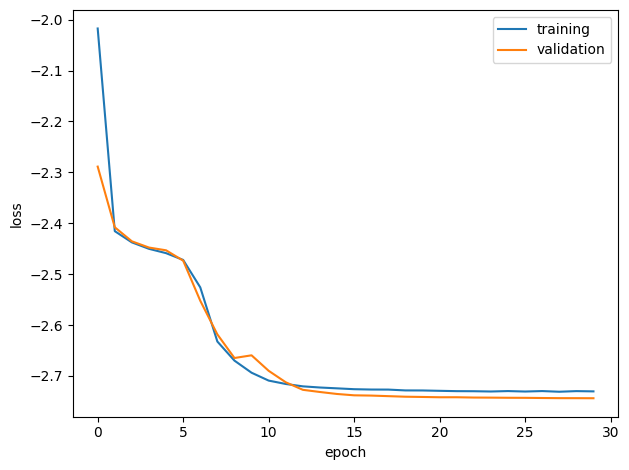

In [24]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(model_snrv.training_losses)), model_snrv.training_losses)
ax.plot(np.arange(len(model_snrv.validation_losses)), model_snrv.validation_losses)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.legend(['training','validation'])
fig.tight_layout()

In [25]:
save_freq = 1 # ps

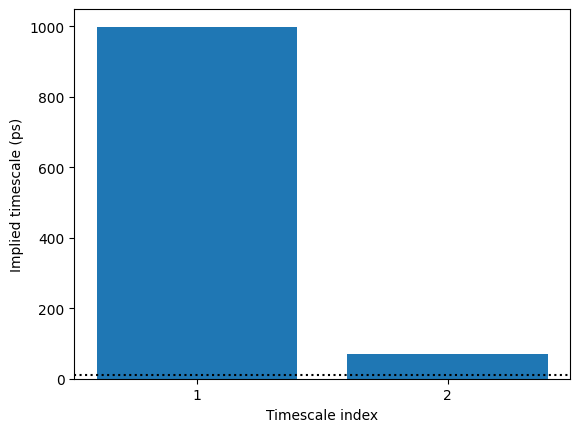

In [26]:
evals = model_snrv.evals.cpu().detach().numpy()
plt.bar(range(1,evals.size), -lag_n*save_freq/np.log(evals[1:]))
plt.ylabel('Implied timescale (ps)')
plt.xticks(range(1,evals.size))
plt.xlabel('Timescale index')
plt.axhline(lag_n*save_freq, color='k', linestyle=':')

In [27]:
model_snrv.eval()

Snrv(
  (activation): GELU(approximate='none')
  (model): Sequential(
    (0): Linear(in_features=231, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): GELU(approximate='none')
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=100, out_features=3, bias=True)
  )
)

In [28]:
evecs = model_snrv.transform(torch.cat(coords_torch)).cpu().detach().numpy()

In [29]:
trj_cat = md.join(trjs)

In [30]:
phi = md.compute_phi(trj_cat)[1].flatten()
psi = md.compute_psi(trj_cat)[1].flatten()

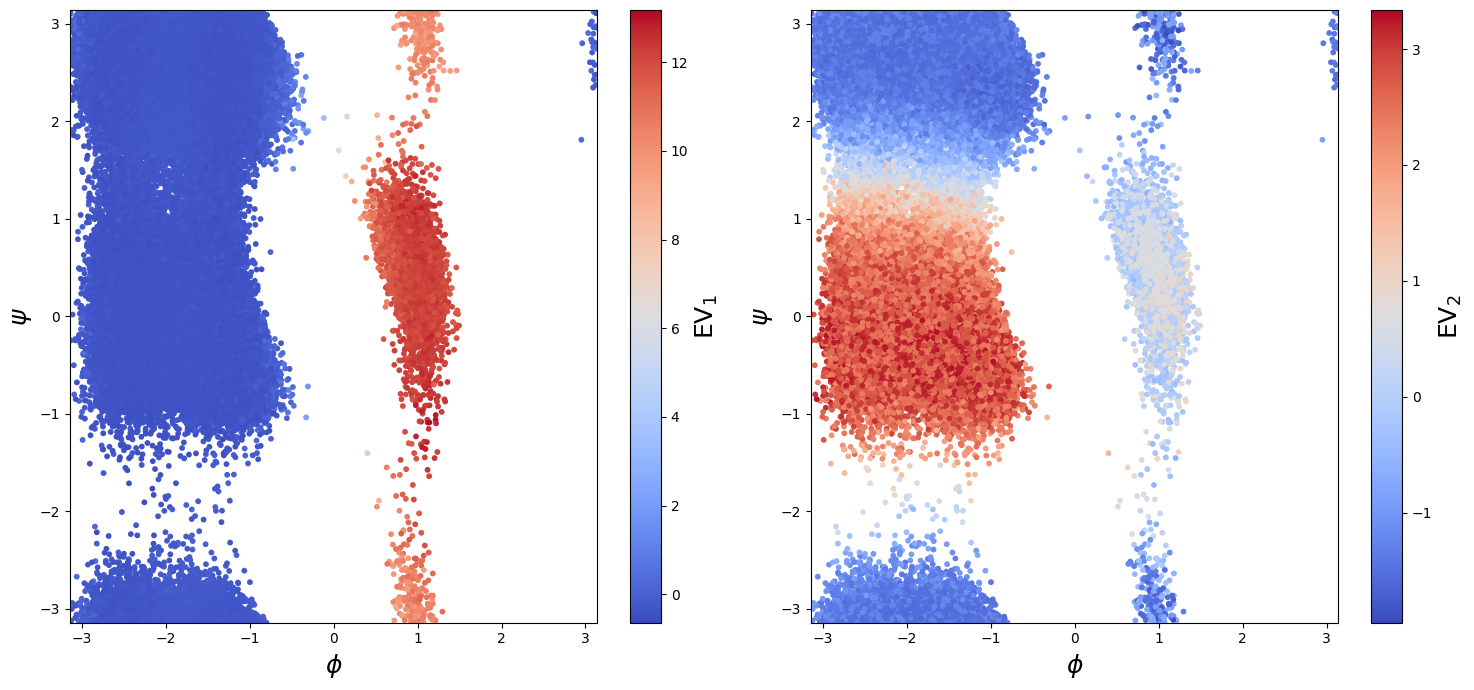

In [31]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7))
axes = axes.flatten()

for e in range(1, evecs.shape[1]):
    evec = evecs[:, e]
    ax = axes[e-1]

    im = ax.scatter(phi, psi, c=evec, s=10, cmap='coolwarm')
    ax.set_xlabel('$\phi$', fontsize=18)
    ax.set_ylabel('$\psi$', fontsize=18)
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-np.pi, np.pi)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(f'EV$_{e}$', size=18)

plt.tight_layout()

In [32]:
CVs = [model_snrv.transform(x).cpu().detach()[:, 1:] for x in coords_torch]
CVs[0].shape, len(CVs)

(torch.Size([250000, 2]), 1)

# MDN propagator (~3 mins)

In [33]:
model_mdn = Propagator(dim = CVs[0].size(1))

In [34]:
model_mdn.fit(CVs, lag = 10, max_epochs=10)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type                  | Params
--------------------------------------------------
0 | mdn     | MixtureDensityNetwork | 33.0 K
1 | _scaler | MinMaxScaler          | 0     
--------------------------------------------------
33.0 K    Trainable params
0         Non-trainable params
33.0 K    Total params
0.132     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


Propagator(
  (mdn): MixtureDensityNetwork(
    (network): MLP(
      (mlp): Sequential(
        (0): Linear(in_features=2, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=128, bias=True)
        (3): SiLU()
        (4): Linear(in_features=128, out_features=125, bias=True)
      )
    )
  )
  (_scaler): MinMaxScaler()
)

In [35]:
n_steps = int(1E2)
x = CVs[0][0][None]
synthetic_traj_CVs = model_mdn.gen_synthetic_traj(x, n_steps)

  0%|          | 0/100 [00:00<?, ?it/s]

# DDPM Decoder (~5 mins)

In [43]:
xyz = list()
for trj in trjs:

    t_backbone = trj.atom_slice(trj.top.select('backbone')).center_coordinates()

    n = trj.xyz.shape[0]

    xyz.append(torch.tensor(t_backbone.xyz.reshape(n, -1)).float())

In [44]:
model_ddpm = DDPM(xyz[0].shape[1], CVs[0].shape[1])

In [45]:
model_ddpm.fit(xyz, CVs, max_epochs=3)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name              | Type              | Params
--------------------------------------------------------
0 | model             | GaussianDiffusion | 4.0 M 
1 | ema_model         | GaussianDiffusion | 4.0 M 
2 | _feature_scaler   | MinMaxScaler      | 0     
3 | _condition_scaler | MinMaxScaler      | 0     
--------------------------------------------------------
7.9 M     Trainable params
0         Non-trainable params
7.9 M     Total params
31.749    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


DDPM(
  (model): GaussianDiffusion(
    (denoise_fn): Unet1D(
      (init_conv): Conv1d(1, 32, kernel_size=(7,), stride=(1,), padding=(3,))
      (time_mlp): Sequential(
        (0): SinusoidalPosEmb()
        (1): Linear(in_features=32, out_features=128, bias=True)
        (2): GELU(approximate='none')
        (3): Linear(in_features=128, out_features=128, bias=True)
      )
      (downs): ModuleList(
        (0): ModuleList(
          (0-1): 2 x ResnetBlock(
            (mlp): Sequential(
              (0): SiLU()
              (1): Linear(in_features=128, out_features=64, bias=True)
            )
            (block1): Block(
              (proj): WeightStandardizedConv2d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
              (norm): GroupNorm(8, 32, eps=1e-05, affine=True)
              (act): SiLU()
            )
            (block2): Block(
              (proj): WeightStandardizedConv2d(32, 32, kernel_size=(3,), stride=(1,), padding=(1,))
              (norm): GroupNor

# Decode synthetic traj (~2 mins)

In [54]:
xyz_gen = model_ddpm.generate(synthetic_traj_CVs)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [55]:
xyz_gen = xyz_gen.reshape(xyz_gen.size(0), -1 , 3).numpy()
fake_trj = md.Trajectory(xyz = xyz_gen, topology=t_backbone.top)
fake_trj

<mdtraj.Trajectory with 100 frames, 8 atoms, 3 residues, without unitcells at 0x7ef43463ce80>

# Visualize results (~1 min)

In [56]:
v = nv.show_mdtraj(fake_trj)
v

NGLWidget(max_frame=99)

In [57]:
fake_trj.save_pdb('ADP_backbone_synthetic_traj.pdb')